

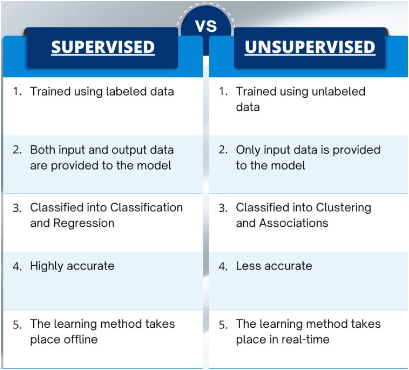



- https://medium.com/mlearning-ai/k-means-clustering-with-scikit-learn-e2af706450e4
- https://realpython.com/k-means-clustering-python/
- https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis (Kindly go through this notebook as it handles EDA as well.)


- K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.
- In k means clustering, we have the specify the number of clusters we want the data to be grouped into. 
- The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
-   i) Reassign data points to the cluster whose centroid is closest. 
    ii) Calculate new centroid of each cluster. 
- These two steps are repeated till the within cluster variation cannot be reduced any further. 
- The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.
- The aim of K-Means clustering is to `maximize the intercluster distance` i.e. clusters should be as far away from each other as possible to make them very distinct and `minimize the intracluster distance` i.e make sure the distance between data points that belong to the same cluster is as small as possible.

## How the K means algorithm works

1. Select K (i.e. 2) random points as cluster centers called centroids
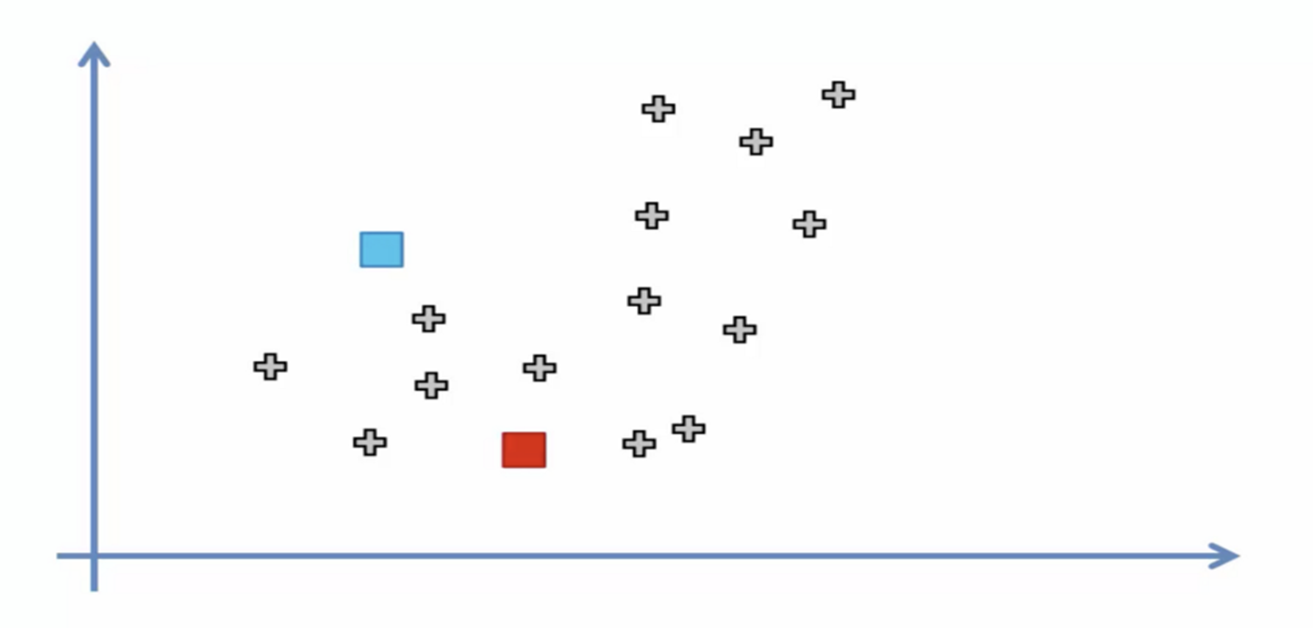


2. Assign each data point to the closest cluster by calculating its distance with respect to each centroid
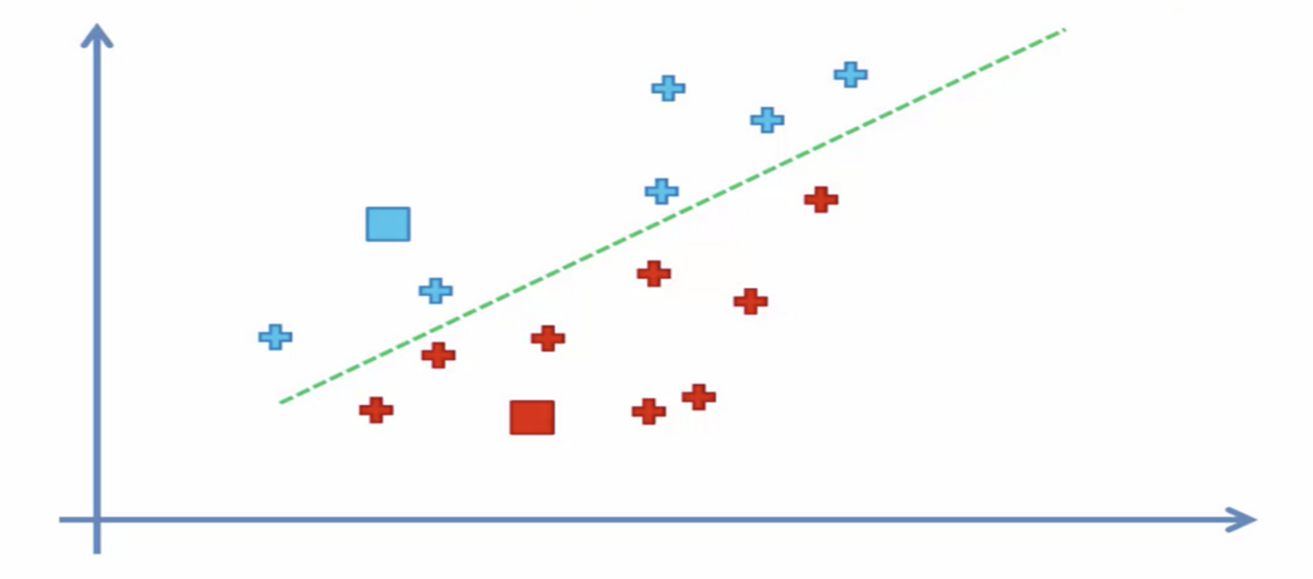

3. Determine the new cluster center by computing the average of the assigned points

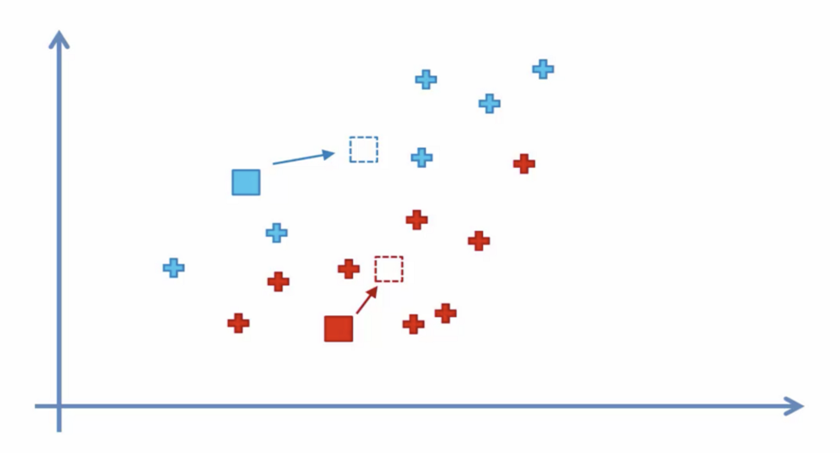

4. Repeat steps 2 and 3 until none of the cluster assignments change

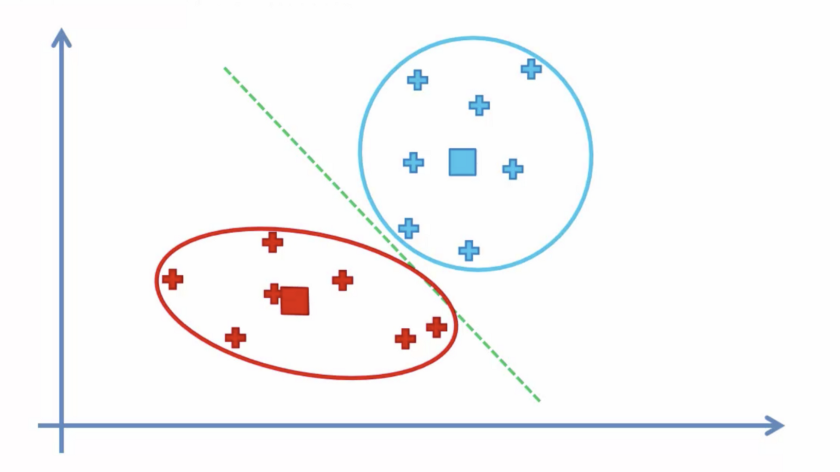

### Choosing the right number of clusters

- Often times the data you’ll be working with will have multiple dimensions making it difficult to visual. As a consequence, the optimum number of clusters is no longer obvious. Fortunately, we have a way of determining this mathematically.

- We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method).


**WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid**

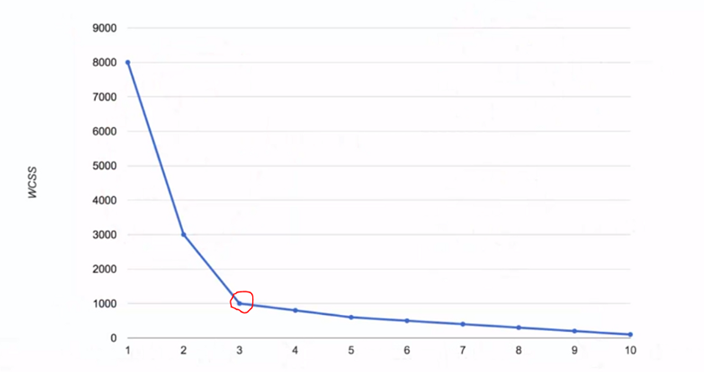

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

_Problem Statement_

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

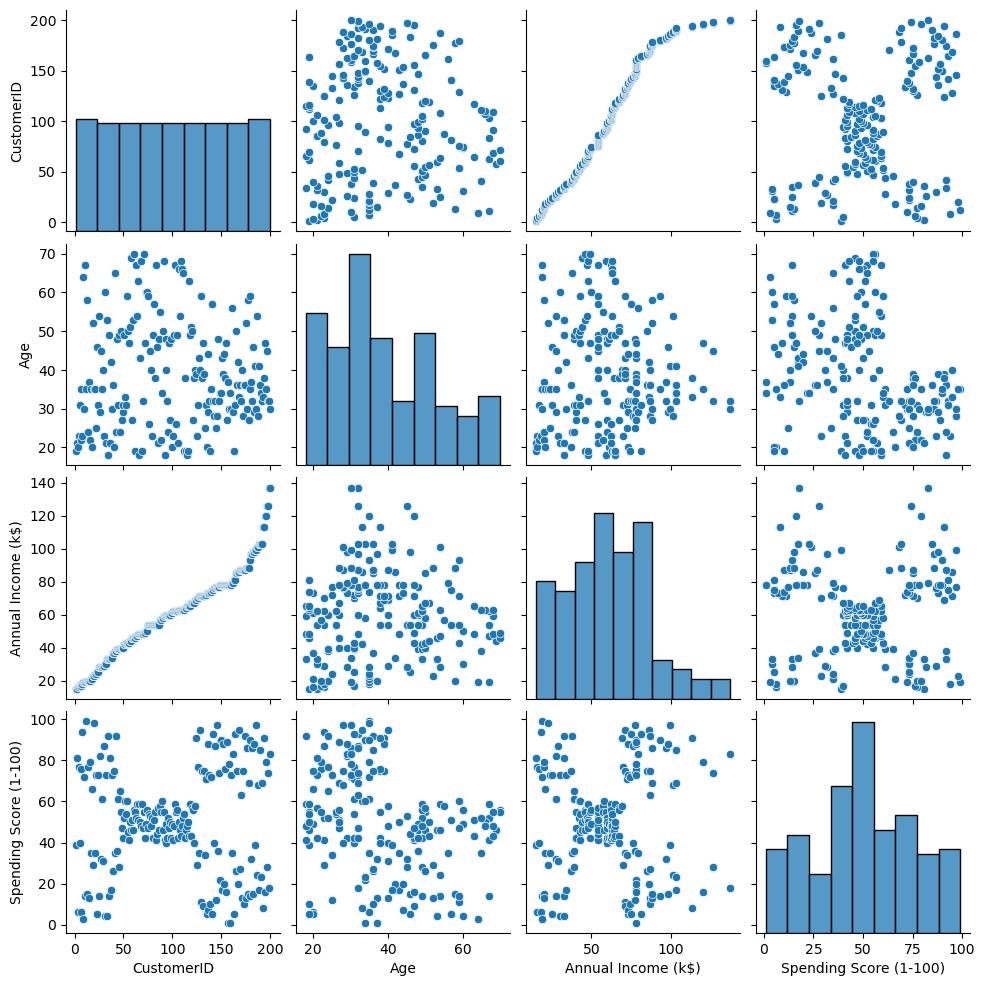

In [7]:
sns.pairplot(df)

### i) Spending Score vs Age

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending score']

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending score'], dtype='object')

In [10]:
X = df.loc[ : , ['Age', 'Spending score']]

X.head()

,Age,Spending score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


**The Elbow Method to find the Number of Optimal Clusters**

https://en.wikipedia.org/wiki/Elbow_method_(clustering)  
https://sklearn.org/modules/clustering.html#k-means  
https://sklearn.org/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [11]:
from sklearn.cluster import KMeans

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

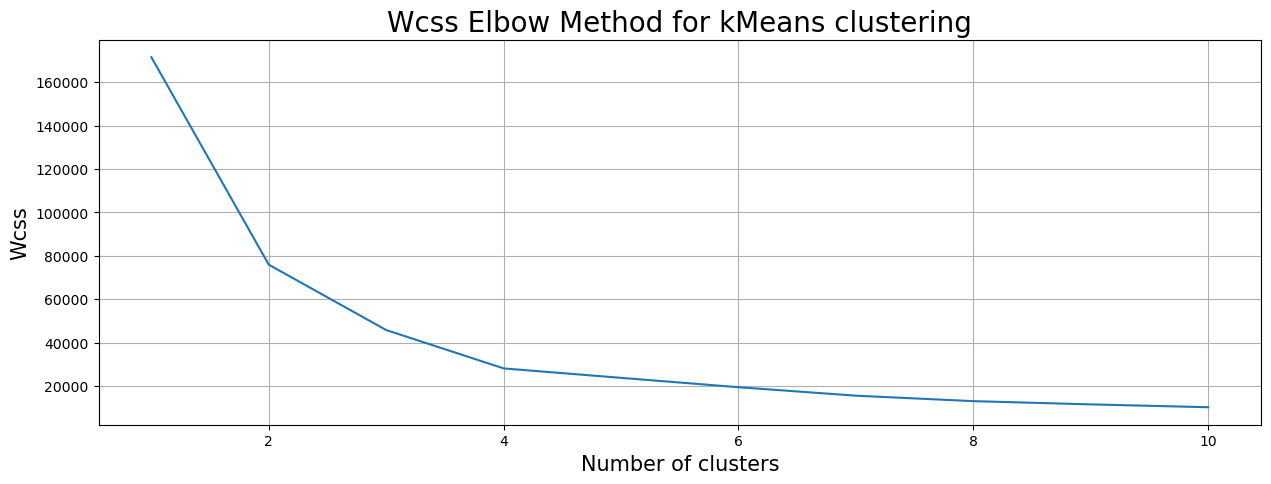

In [12]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15, 5))
plt.title('Wcss Elbow Method for kMeans clustering', fontsize = 20)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Wcss', fontsize = 15)
plt.plot(range(1,11), wcss)
plt.grid(True)


In [19]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [20]:
assignments = kmeans.fit_predict(X)

assignments

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [21]:
X[assignments == 0]

,Age,Spending score
2,20,6
6,35,6
8,64,3
10,67,14
12,58,15
14,37,13
18,52,29
22,46,5
24,54,14
26,45,32


In [22]:
cluster_one = pd.DataFrame(X[assignments == 0]).reset_index(drop = True)

cluster_one.head()

,Age,Spending score
0,20,6
1,35,6
2,64,3
3,67,14
4,58,15


In [23]:
cluster_two = pd.DataFrame(X[assignments == 1]).reset_index(drop = True)

cluster_three = pd.DataFrame(X[assignments == 2]).reset_index(drop = True)

cluster_four = pd.DataFrame(X[assignments == 3]).reset_index(drop = True)

- In as much as kMeans will tell us how many number of clusters are optimal, it does not tell us what it is that makes those data points that are in a cluster to be clustered together. 
- Then it is up to an individual to explore that. That can be done by visualizing the clusters, examining the points, then giving the clusters appropriate labels as we have here. 

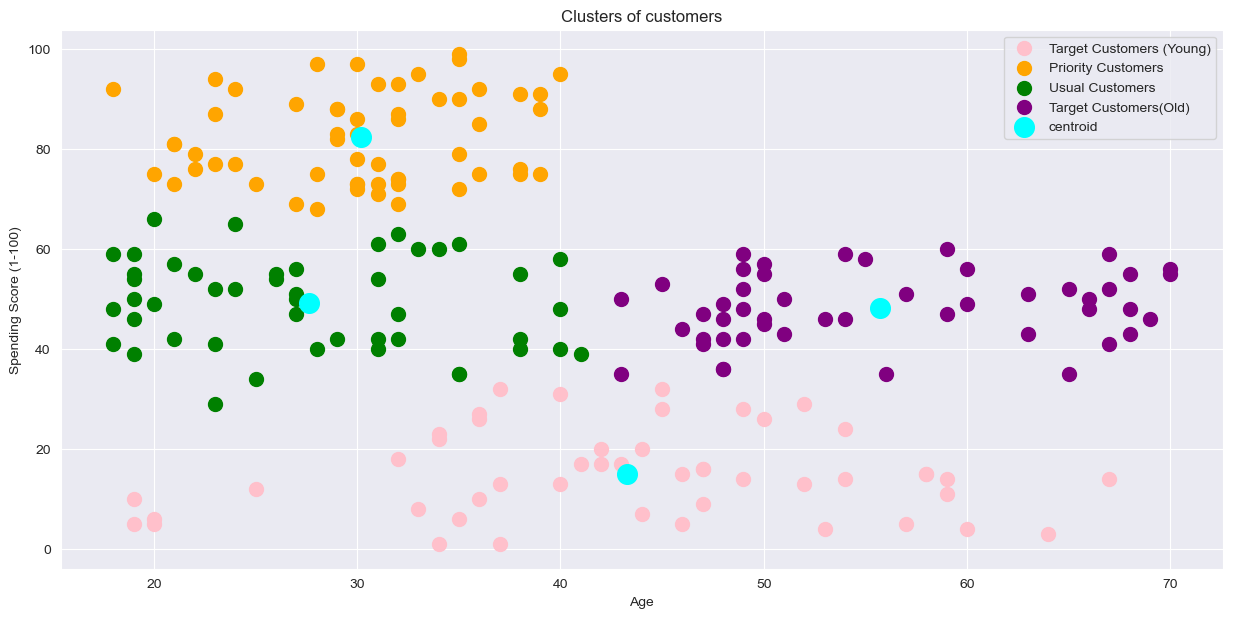

In [24]:
sns.set_style('darkgrid')

plt.figure(figsize = (15,7))

plt.scatter(cluster_one['Age'], cluster_one['Spending score'], s = 100, c = 'pink', label = 'Target Customers (Young)' )
plt.scatter(cluster_two['Age'], cluster_two['Spending score'], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(cluster_three['Age'], cluster_three['Spending score'], s = 100, c = 'green', label = 'Usual Customers')
plt.scatter(cluster_four['Age'], cluster_four['Spending score'], s = 100, c = 'purple', label = 'Target Customers(Old)')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 200, c = 'cyan' , label = 'centroid')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [25]:
#cluster_two.to_csv('Priority Customers.csv')

#### 5 clusters

In [26]:
kmeans_5_clusters = KMeans(n_clusters = 5  , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

assign = kmeans_5_clusters.fit_predict(X)

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
cluster1 = pd.DataFrame(X[assign == 0]).reset_index(drop = True)

cluster2 = pd.DataFrame(X[assign == 1]).reset_index(drop = True)

cluster3 = pd.DataFrame(X[assign == 2]).reset_index(drop = True)

cluster4 = pd.DataFrame(X[assign == 3]).reset_index(drop = True)

cluster5 = pd.DataFrame(X[assign == 4]).reset_index(drop = True)

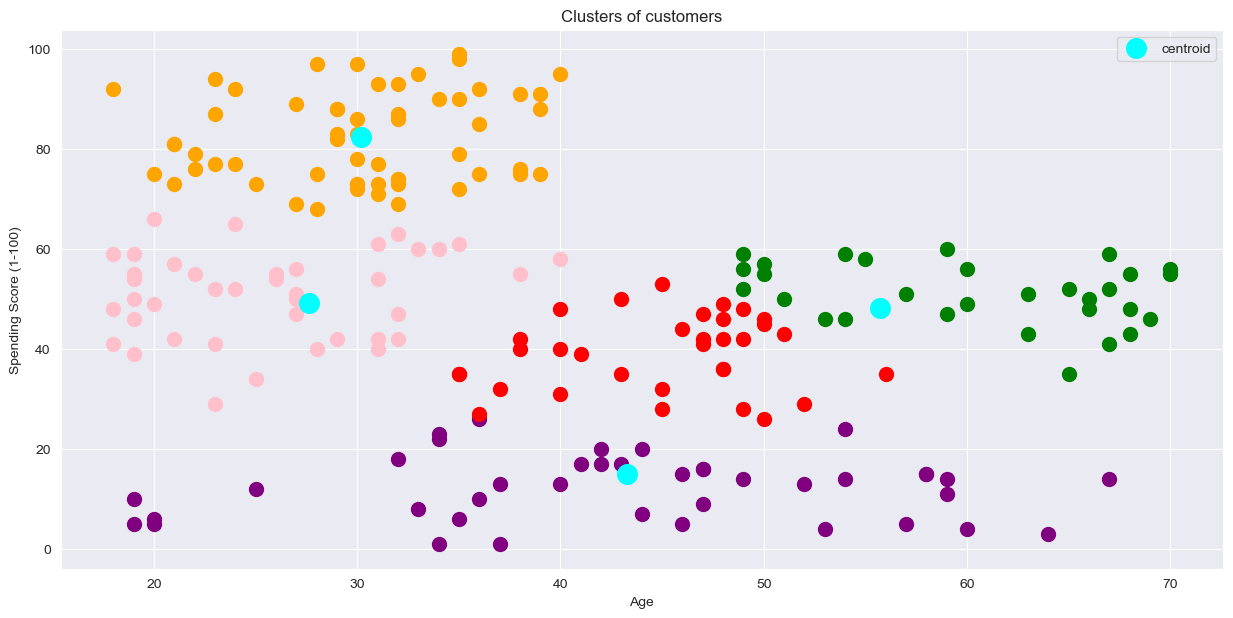

In [28]:
sns.set_style('darkgrid')

plt.figure(figsize = (15,7))

plt.scatter(cluster1['Age'], cluster1['Spending score'], s = 100, c = 'pink' )
plt.scatter(cluster2['Age'], cluster2['Spending score'], s = 100, c = 'orange')
plt.scatter(cluster3['Age'], cluster3['Spending score'], s = 100, c = 'green')
plt.scatter(cluster4['Age'], cluster4['Spending score'], s = 100, c = 'purple')
plt.scatter(cluster5['Age'], cluster5['Spending score'], s = 100, c = 'red')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 200, c = 'cyan' , label = 'centroid')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()

### ii) Annual Income vs Spending score. 

In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending score'], dtype='object')

In [30]:
X = df.iloc[ : , [3,4]]

X.head()

,Annual Income,Spending score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [31]:
sns.set_style('darkgrid')

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

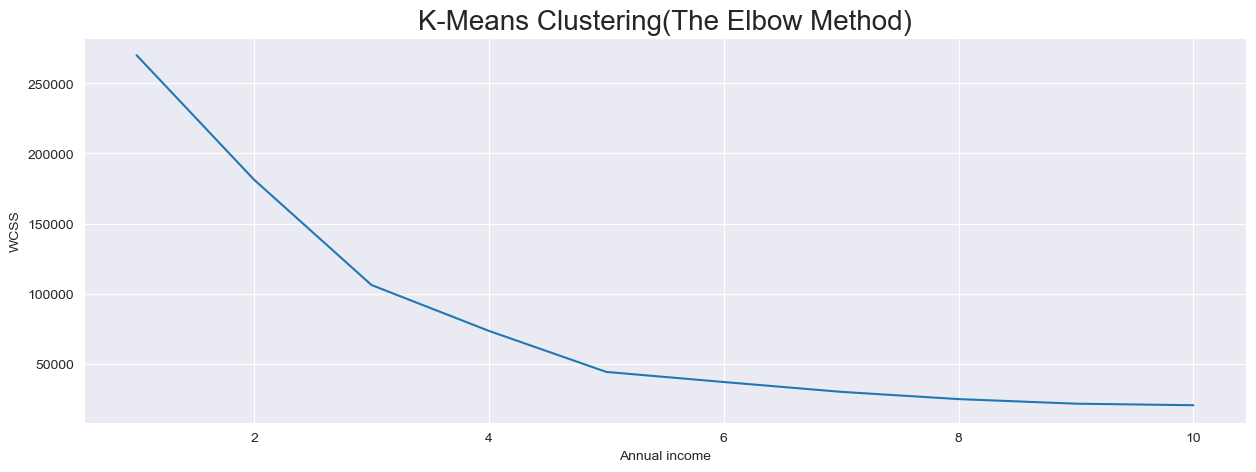

In [32]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (15, 5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Annual income')
plt.ylabel('WCSS')
plt.grid(True)

#### For this data, the curve elbows off at 5, so that is the optimal number of clusters.

In [36]:
#TODO: Implement K-Means Clustering with 3 clusters

In [33]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model = kmeans.fit_predict(X) 

#Compute cluster centers and predict cluster index for each sample.
#Convenience method; equivalent to calling fit(X) followed by predict(X).

model

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [34]:
cluster_one = pd.DataFrame(X[model == 0]).reset_index(drop = True)

cluster_two = pd.DataFrame(X[model == 1]).reset_index(drop = True)

cluster_three = pd.DataFrame(X[model == 2]).reset_index(drop = True)

cluster_four = pd.DataFrame(X[model == 3]).reset_index(drop = True)

cluster_five = pd.DataFrame(X[model == 4]).reset_index(drop = True)


cluster_five.head()

,Annual Income,Spending score
0,15,39
1,16,6
2,17,40
3,18,6
4,19,3


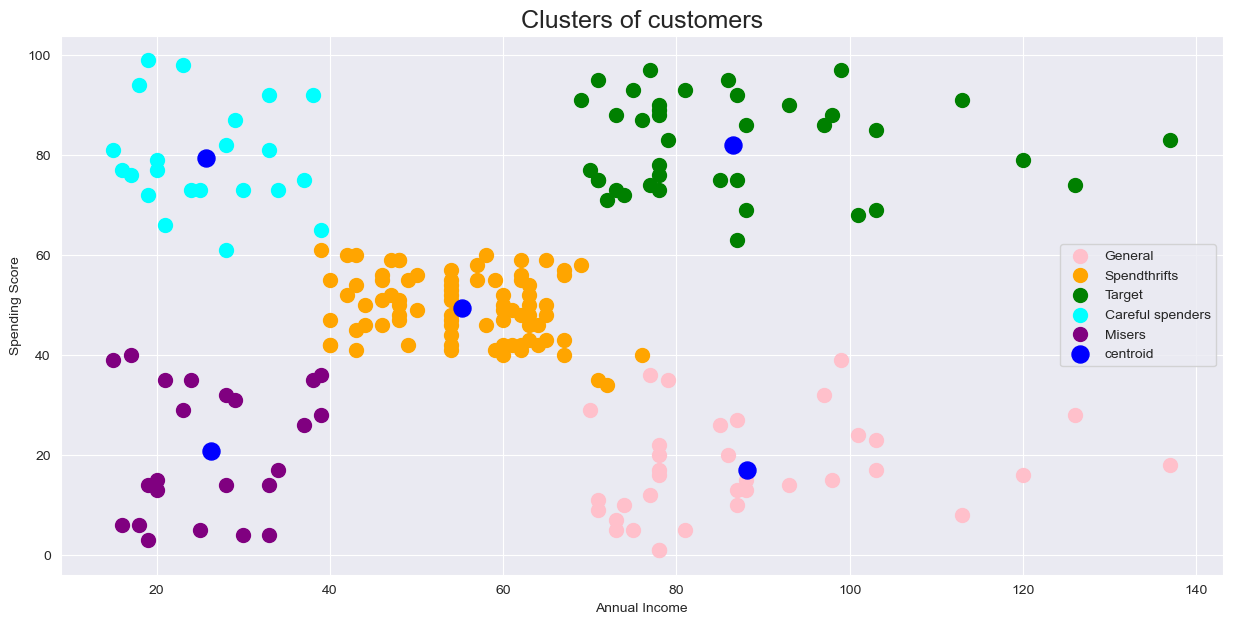

In [35]:
plt.figure(figsize = (15,7))


plt.scatter(cluster_one['Annual Income'], cluster_one['Spending score'], s = 100, c = 'pink', label = 'General')
plt.scatter(cluster_two['Annual Income'], cluster_two['Spending score'], s = 100, c = 'orange', label = 'Spendthrifts')
plt.scatter(cluster_three['Annual Income'], cluster_three['Spending score'], s = 100, c = 'green', label = 'Target')
plt.scatter(cluster_four['Annual Income'], cluster_four['Spending score'], s = 100, c = 'cyan', label = 'Careful spenders')
plt.scatter(cluster_five['Annual Income'], cluster_five['Spending score'], s = 100, c = 'purple', label = 'Misers')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 150, c = 'blue' , label = 'centroid')

plt.title('Clusters of customers', fontsize = 18)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

In [37]:
#TODO: Implement K-Means Clustering with gender and spending score

# Spending score and gender

In [38]:
X = df.loc[:, ['Gender', 'Spending score']]

X.head()

,Gender,Spending score
0,Male,39
1,Male,81
2,Female,6
3,Female,77
4,Female,40


In [40]:
#convert to cat codes
X['Gender'] = X['Gender'].astype('category')
X['Gender'] = X['Gender'].cat.codes
X.head()

,Gender,Spending score
0,1,39
1,1,81
2,0,6
3,0,77
4,0,40


c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

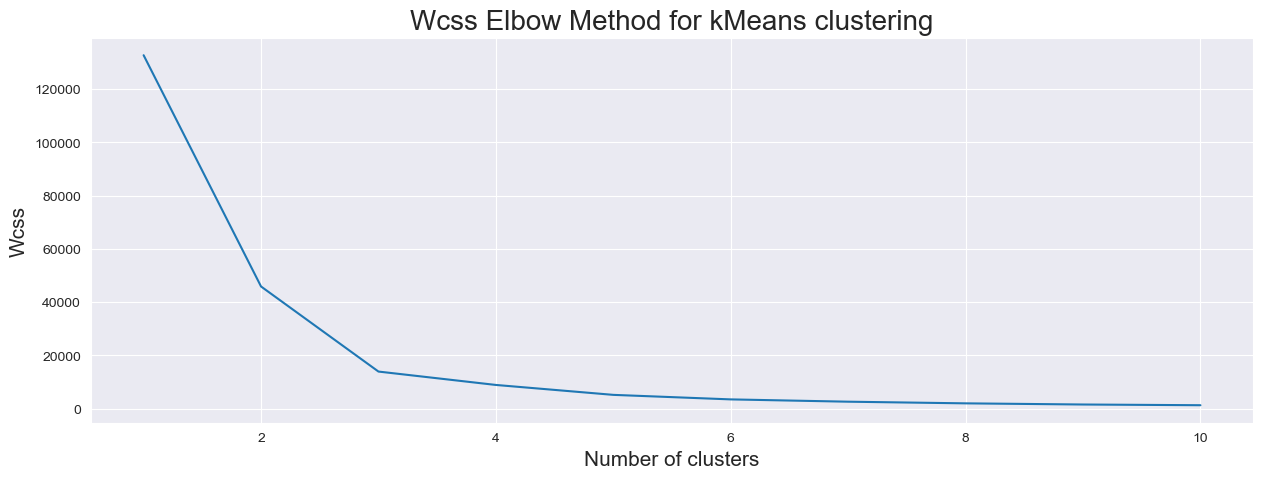

In [41]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (15, 5))
plt.title('Wcss Elbow Method for kMeans clustering', fontsize = 20)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Wcss', fontsize = 15)
plt.plot(range(1,11), wcss)
plt.grid(True)

In [42]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

model1 = kmeans.fit_predict(X)
model1

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [43]:
cluster1 = pd.DataFrame(X[assign == 0]).reset_index(drop = True)

cluster2 = pd.DataFrame(X[assign == 1]).reset_index(drop = True)

cluster3 = pd.DataFrame(X[assign == 2]).reset_index(drop = True)

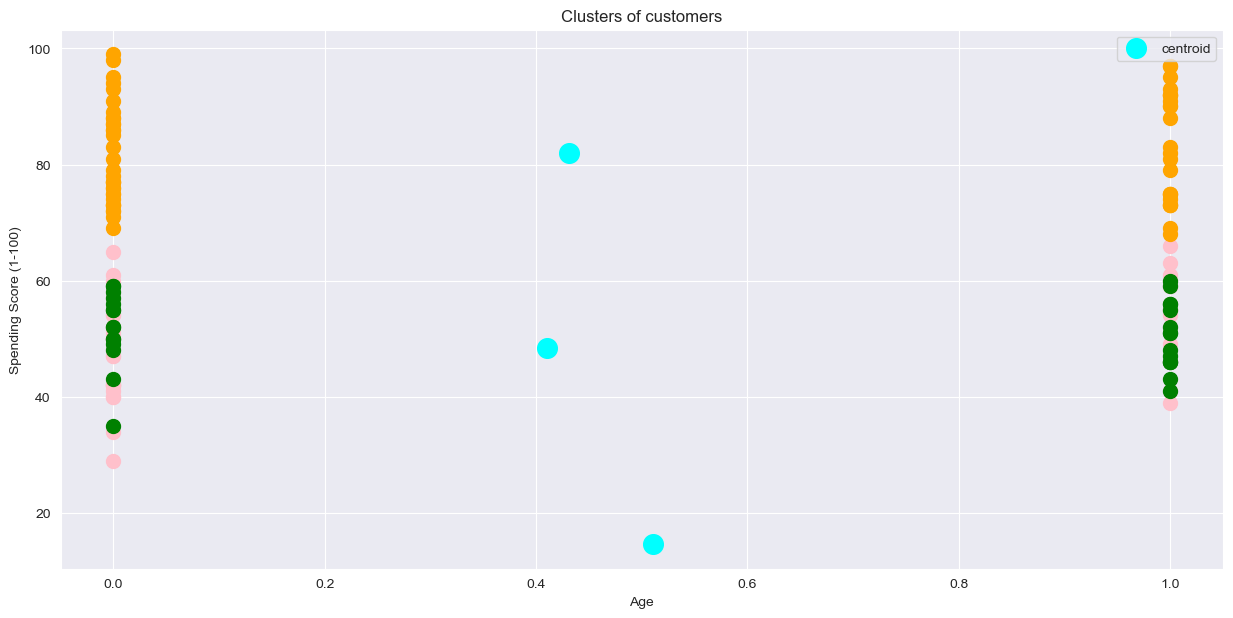

In [47]:
sns.set_style('darkgrid')

plt.figure(figsize = (15,7))

plt.scatter(cluster1['Gender'], cluster1['Spending score'], s = 100, c = 'pink' )
plt.scatter(cluster2['Gender'], cluster2['Spending score'], s = 100, c = 'orange')
plt.scatter(cluster3['Gender'], cluster3['Spending score'], s = 100, c = 'green')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 200, c = 'cyan' , label = 'centroid')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()